In [37]:
# 모듈 로딩
from tensorflow.keras import Sequential  # 모델 객체
from tensorflow.keras.layers import Dense, Dropout  # 레이어 객체
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## [1] 데이터 불러오기

In [17]:
(x_train, y_train), (x_test, y_test)=load_data()

In [18]:
print(f'x_train.shape, x_test.shape : {x_train.shape}, {x_test.shape}')
print(f'y_train.shape, y_test.shape : {y_train.shape}, {y_test.shape}')

x_train.shape, x_test.shape : (60000, 28, 28), (10000, 28, 28)
y_train.shape, y_test.shape : (60000,), (10000,)


## [2] 데이터 분리

In [19]:
# 검증용 데이터 셋 준비
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train)

In [20]:
print(f'x_train.shape, x_val.shape : {x_train.shape}, {x_val.shape}')
print(f'y_train.shape, y_val.shape : {y_train.shape}, {y_val.shape}')

x_train.shape, x_val.shape : (45000, 28, 28), (15000, 28, 28)
y_train.shape, y_val.shape : (45000,), (15000,)


## [3] 데이터 전처리 - 스케일링, 인코딩

In [21]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0 ~ 1.0으로 스케일링
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [22]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
# 타겟 라벨 => OneHotEncoding으로 변환
encoder=OneHotEncoder()

In [25]:
encoder.fit(y_train.reshape(-1, 1))

OneHotEncoder()

In [26]:
y_train=encoder.transform(y_train.reshape(-1, 1))

In [27]:
type(y_train)

scipy.sparse.csr.csr_matrix

In [28]:
y_train=y_train.toarray()
type(y_train)

numpy.ndarray

In [29]:
y_test=encoder.transform(y_test.reshape(-1, 1))
y_test=y_test.toarray()
y_val=encoder.transform(y_val.reshape(-1, 1))
y_val=y_val.toarray()

In [30]:
x_train=x_train.reshape(-1, 28*28)
x_val=x_val.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

## [4] 모델 생성

In [45]:
model=Sequential(name='practice')

In [46]:
model.add(Dense(100, activation='relu', input_shape=(784, )))

In [47]:
model.add(Dropout(0.4))

In [48]:
model.add(Dense(200, activation='relu'))

In [49]:
model.add(Dropout(0.4))

In [50]:
model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "practice"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 100,710
Trainable params: 100,710
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

## [5] 학습

In [52]:
his=model.fit(x_train, y_train, epochs=30,
         validation_data=(x_val, y_val))

Epoch 1/30
1407/1407 [==============================] - 8s 5ms/step - loss: 0.4658 - accuracy: 0.8570 - val_loss: 0.1891 - val_accuracy: 0.9419
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2497 - accuracy: 0.9262 - val_loss: 0.1387 - val_accuracy: 0.9593
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2048 - accuracy: 0.9385 - val_loss: 0.1217 - val_accuracy: 0.9637
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1782 - accuracy: 0.9470 - val_loss: 0.1162 - val_accuracy: 0.9644
Epoch 5/30
1407/1407 [==============================] - 6s 5ms/step - loss: 0.1661 - accuracy: 0.9503 - val_loss: 0.1048 - val_accuracy: 0.9681
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1524 - accuracy: 0.9531 - val_loss: 0.0977 - val_accuracy: 0.9701
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1481 - accuracy: 0.9544 - val_loss: 0.0991 - val_accuracy:

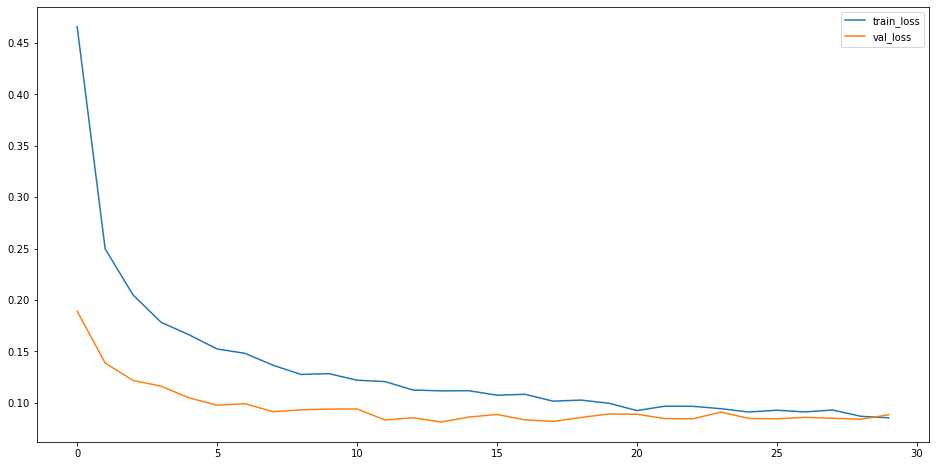

In [53]:
plt.figure(figsize=(16, 8))
plt.plot(his.epoch, his.history['loss'], label='train_loss')
plt.plot(his.epoch, his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

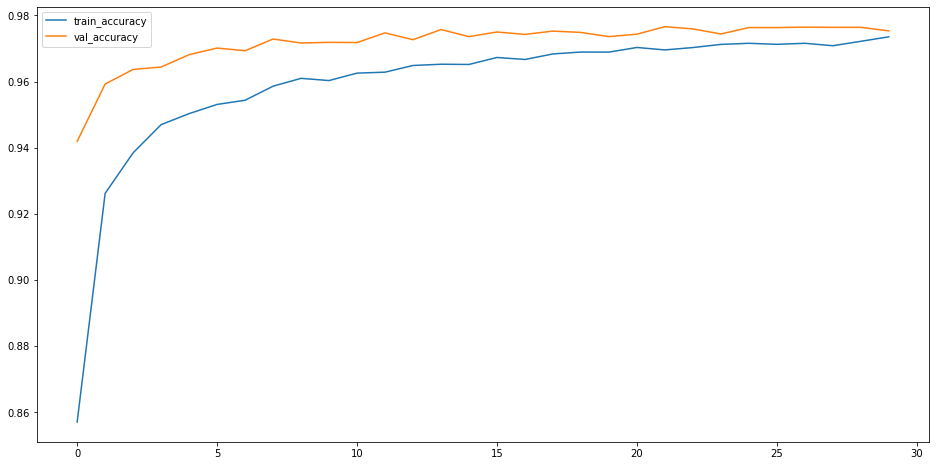

In [54]:
plt.figure(figsize=(16, 8))
plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## [6] 모델 평가

In [55]:
test_result=model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9760


In [56]:
test_result

[0.08499940484762192, 0.9760000109672546]

## [7] 예측

In [59]:
np.round(model.predict(x_test[[0]]),2)

1/1 [==============================] - 0s 32ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [60]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])